# Comparing two samples that are not normally distributed
authors: Maja H Kirkeby, Bernardo Santos, and João P. Fernandes
https://inferentialthinking.com/chapters/12/1/AB_Testing.html

This test can be used for showing that there is an underlying difference in the populations, no matter the distribution of the population. This test is less powerful than the ANOVA test, but random sampling does not have any assumptions. The chance model that we will test whether there is no underlying difference in the populations, i.e., that the distributions in the samples are different just due to chance.

**Interpretation:**
- H0: In the population, the distribution of energy consumptions of program A executions is the same as for program B. The difference in the sample is due to chance.
- H1: In the population, the executions of program A  have a lower energy consumption, on average, than executions of program B 

The alternative hypothesis compares the average energy consumptions  of the two groups and says that the average for the executions of program A is smaller. Therefore, it is reasonable for us to use the difference between the two group means as our statistic.

*Since we are indifferent to outliers, we can leave them in.*

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import random

In [2]:
ls

C.csv
Comparing samples from normal distributions.ipynb
Comparing two non-normal distributions by random sampling.ipynb


In [3]:
# import your file into a Pandas dataframe 
file_name = 'C.csv'
df = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".", names=['test','PKG','CPU','nn','nn2','time'])


In [4]:
df

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.013184,0.010925,,,3.069
1,bubblesort,0.015198,0.009399,,,2.617
2,bubblesort,0.010559,0.009583,,,2.572
3,bubblesort,0.009949,0.009949,,,2.671
4,bubblesort,0.015381,0.010010,,,2.684
...,...,...,...,...,...,...
1435,bubblesort_ll,0.013184,0.014038,,,2.394
1436,bubblesort_ll,0.021362,0.014343,,,2.428
1437,bubblesort_ll,0.013672,0.014221,,,2.479
1438,bubblesort_ll,0.019531,0.014526,,,2.537


<AxesSubplot:xlabel='CPU', ylabel='time'>

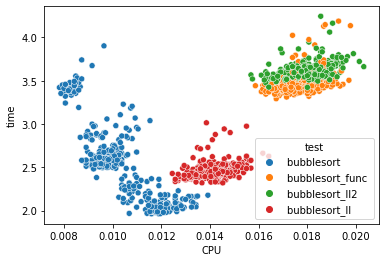

In [5]:
sns.scatterplot(data=df,x='CPU',y='time',hue='test')

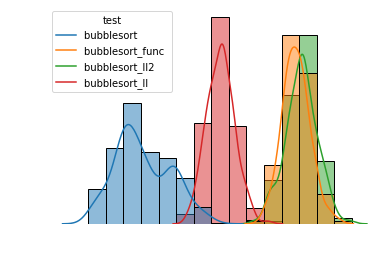

In [6]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)
# Some plots to provide an overview of the data
#sns.boxplot(data=df,x='test',y='CPU')
sns.histplot(data=df,x='CPU',hue='test')
#plt.show()
sns.kdeplot(data=df,hue='test',x='CPU')
# in the following example we are comparing the "bubblesort" (blue) and bubblesort_func (orange) 
plt.savefig('Bubblesort C')


# Hypothesis:
- Null hypothesis: In the population, the distribution of energy consumptions of program A executions is the same as for program B. The difference in the sample is due to chance.
- Alternative hypothesis: In the population, the executions of program A  have a lower energy consumption, on average, than executions of program B 

In [11]:
# define the data source and how to separate the data (which test is program A and which is program B)
data = df
data_column = 'CPU'         # The column name with the data that we want to compare
types_column_name = 'test'  # The column name with the data in it
programA = 'bubblesort_func '  # The category of data A
programB = 'bubblesort_ll2 '       # The category of data B

repetitions_of_random_sampling = 10000

# create a new dataframe with the interesting subset 
data_set=data[(data[types_column_name]==programA) | (data[types_column_name]==programB)]
data_set.reset_index()

# count the number of samples in each data set 
count_A = data[data[types_column_name]==programA][types_column_name].count()
count_B = data[data[types_column_name]==programB][types_column_name].count()
org_mean_diff = data[data[types_column_name]==programA][data_column].mean()-data[data[types_column_name]==programB][data_column].mean()
if count_A != count_B: printf("Warning: The data original data sets do not have equally many elements: Data set A has {count_A} elements and Data set B has {count_B} elements")
                              
total = count_A+count_B
fact_r = math.factorial(total)

max_combinations = math.factorial(total) /(math.factorial(count_A) * math.factorial(total-count_A))
if max_combinations < repetitions_of_random_sampling: 
    printf("Warning: The number of possible combinations when picking {count_A} elements from {total} elements is {max_combinations} and you have chosen {repetitions_of_random_sampling} repetitions, thus including some repetitions.")
                              
list_index = list(range(total))

mean_diffs = []
for i in range(repetitions_of_random_sampling):
    samples = random.sample(list_index,total)
    sampleA_index = samples[:count_A]
    sampleB_index = samples[count_A:]
    
    sampleA = data_set.iloc[sampleA_index]
    sampleB = data_set.iloc[sampleB_index]
    
    mean_diff = sampleA[data_column].mean()-sampleB[data_column].mean()
    mean_diffs.append(mean_diff)
    

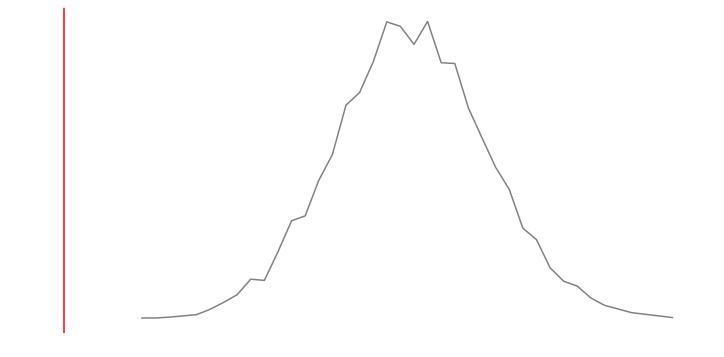

In [12]:
# evaluate the histogram
fig, ax = plt.subplots(figsize=(12, 6))
values, base = np.histogram(mean_diffs, bins=40)
plt.plot(base[:-1], values, c='gray')
# a red line indicating the original difference between the averages of the original samples 
plt.axvline(x = org_mean_diff, color = 'red', label = 'difference between original samples')
plt.show()

Notice that the distribution is centered roughly around 0. This is because that under the null hypothesis the two groups should have roughly the same average.

# Calculating the p value
Remember that it said that the alternative hypothesis stated the executions of program A have a lower energy consumption, on average, than executions of program B

In [9]:

empirical_p = np.count_nonzero(pd.Series(mean_diffs) <= org_mean_diff) / repetitions_of_random_sampling
empirical_p

0.0

In [10]:
# conclusion:
print(f"If the empirical p-value is 0 ,it means that none of the {repetitions_of_random_sampling} permuted samples "+
       f"resulted in a difference of {org_mean_diff} or lower. This is only an approximation. "+
       "The probability of getting a difference in that range is not 0, but it is very small,"+
       "according to our simulation. Therefore we can reject the null hypothesis.")



If the empirical p-value is 0 ,it means that none of the 1000 permuted samples resulted in a difference of -0.00025007459852430594 or lower. This is only an approximation. The probability of getting a difference in that range is not 0, but it is very small,according to our simulation. Therefore we can reject the null hypothesis.
